In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1,
                                           noise=20, random_state=1)

# X_numpy: 100x1
# y_numpy: 100,
# n_features -> X_numpy가 변함 (100행 n_features열)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

In [2]:
print(X_numpy.shape)
print(y_numpy.shape)

(100, 1)
(100,)


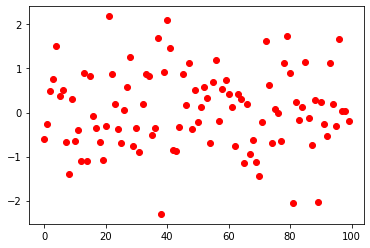

In [3]:
plt.plot(X_numpy, 'ro')

epoch: 10, loss: 4343.1123
epoch: 20, loss: 3242.8918
epoch: 30, loss: 2446.2869
epoch: 40, loss: 1868.9250
epoch: 50, loss: 1450.0718
epoch: 60, loss: 1145.9457
epoch: 70, loss: 924.9455
epoch: 80, loss: 764.2319
epoch: 90, loss: 647.2801
epoch: 100, loss: 562.1205


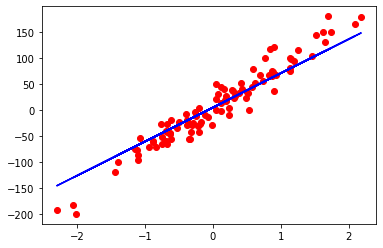

In [4]:
# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
num_epochs = 100

for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch+1)%10 == 0:
        print('epoch: {}, loss: {:.4f}'.format(epoch+1, loss))

# plot
predicted = model(X).detach().numpy() # convert to numpy
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()